In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def Data_Reading(path):
    df = pd.read_csv(path)
    return df

In [4]:
def plot_bird_strikes_over_years(df):
    df['FlightDate'] = pd.to_datetime(df['FlightDate'])
    df['Year'] = df['FlightDate'].dt.year
    plt.figure(figsize=(10, 5))
    plt.bar(df['Year'], df['Wildlife: Number Struck Actual'], color='green')
    plt.xlabel('Year')
    plt.ylabel('WildlifeStrike Count')
    plt.title('Yearly bird strikes')
    plt.show()

In [5]:
def us_airlines_with_highest_strikes(df):
    airlines_data = df[df['Aircraft: Airline/Operator'].notna() & df['Aircraft: Airline/Operator'].str.contains('AIRLINES')]
    plt.figure(figsize=(10, 5))
    top_airlines = airlines_data['Aircraft: Airline/Operator'].value_counts().nlargest(10)
    sns.barplot(x=top_airlines.values, y=top_airlines.index, palette='viridis')
    plt.title('Top ten US airlines which encountered bird strikes')
    plt.xlabel('Number of Bird Strikes')
    plt.ylabel('Airline and Operator')
    plt.show()

In [27]:
def most_incident_airports(df):
    plt.figure(figsize=(15, 5))
    top_airports = df['Airport: Name'].value_counts().nlargest(50)
    sns.barplot(x=top_airports.values, y=top_airports.index, palette='viridis')
    plt.title('Top 50 Airports with the most incidents of bird strikes')
    plt.xlabel('Number of Bird Strikes')
    plt.ylabel('Name of Airport')
    plt.show()

In [7]:
def annual_expense_caused_by_incidents(df):
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='Year', y='Cost: Total $', data=df, estimator=sum, ci=None, marker='o', color='blue')
    plt.yscale('log')
    plt.title('Annual Expense Caused by Bird Incidentss')
    plt.xlabel('Year')
    plt.ylabel('Total Expense in dollars')
    plt.show()

In [8]:
def plot_bird_strike_distribution(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis')
    plt.title('Distribution of Bird Strikes Across Flight Phases')
    plt.xlabel('Flight Phase')
    plt.ylabel('Bird Strike Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [9]:
def altitude_of_airplanes_at_time_of_strike(df):
    df['Feet above ground'] = pd.to_numeric(df['Feet above ground'], errors='coerce')
    plt.figure(figsize=(10, 5))
    plt.bar(df['Feet above ground'], df['Wildlife: Number Struck Actual'])
    plt.title('Airplane Altitude During Bird Strikes')
    plt.xlabel('Altitude in feet')
    plt.ylabel('Count of Bird Strikes')
    plt.show()

In [10]:
def plot_flight_phase_at_strike(df):
    plt.figure(figsize=(10, 5))
    sns.countplot(x='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis')
    plt.title('Flight Phase at Time of Bird Strike')
    plt.xlabel('Flight Phase')
    plt.ylabel('Count of Bird Strikes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [11]:
def plot_airplane_altitudes(df):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='When: Phase of flight', y='Feet above ground', hue='When: Phase of flight', data=df,
                order=df['When: Phase of flight'].value_counts().index, palette='viridis')
    plt.title('Average Altitude of Airplanes in Various Flight Phases During Bird Strike')
    plt.xlabel('Flight Phase')
    plt.ylabel('Altitude in feet')
    plt.legend(title='Flight Phase', loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.show()

In [12]:
def visualize_bird_strike_impact(df):
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Effect: Impact to flight', data=df, order=df['Effect: Impact to flight'].value_counts().index, palette='Set2')
    plt.title('Bird Strikes and Their Impact on Flight')
    plt.xlabel('Flight Impact')
    plt.ylabel('Count of Bird Strikes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [13]:
def plot_bird_strike_impact_by_altitude(df):
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Effect: Impact to flight', data=df, palette='viridis')
    plt.title('Bird Strike Impact at Various Altitudes')
    plt.xlabel('Flight Impact')
    plt.ylabel('Count of Bird Strikes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [14]:
def visualize_bird_strike_impact(df):
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Effect: Impact to flight', hue='Pilot warned of birds or wildlife?', data=df, palette='pastel')
    plt.title('Impact of Bird Strikes and Pilot Alerts')
    plt.xlabel('Flight Impact')
    plt.ylabel('Count of Bird Strikes')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Pilot Warned', loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.show()

In [15]:
path = "/content/drive/MyDrive/Unified Mentor/Bird Strikes data.csv"
df = Data_Reading(path)
df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


<ipython-input-4-88bb02e3ae61>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FlightDate'] = pd.to_datetime(df['FlightDate'])


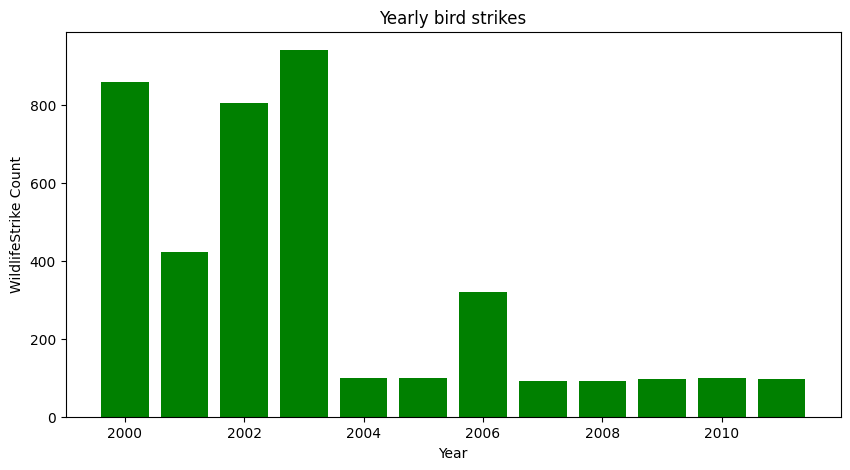

In [16]:
plot_bird_strikes_over_years(df)

<ipython-input-5-3369de733b6e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airlines.values, y=top_airlines.index, palette='viridis')


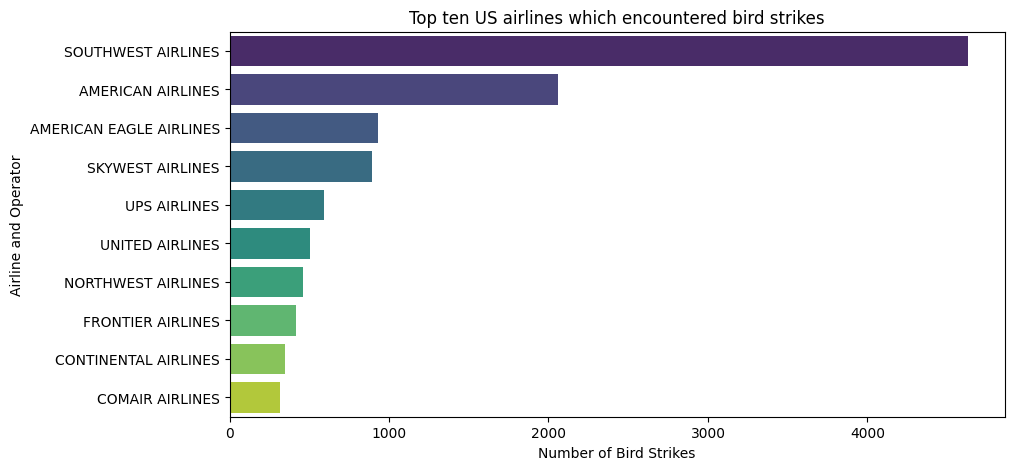

In [17]:
us_airlines_with_highest_strikes(df)

<ipython-input-27-f628da4b3423>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airports.values, y=top_airports.index, palette='viridis')


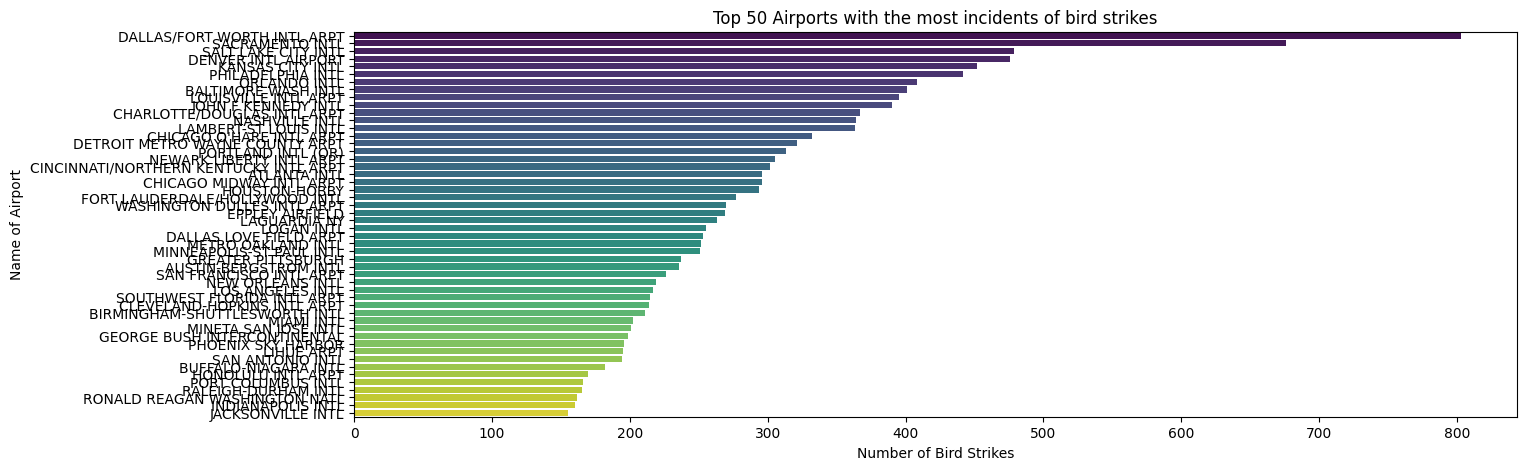

In [28]:
most_incident_airports(df)

<ipython-input-7-06a3652a9ff0>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Cost: Total $', data=df, estimator=sum, ci=None, marker='o', color='blue')


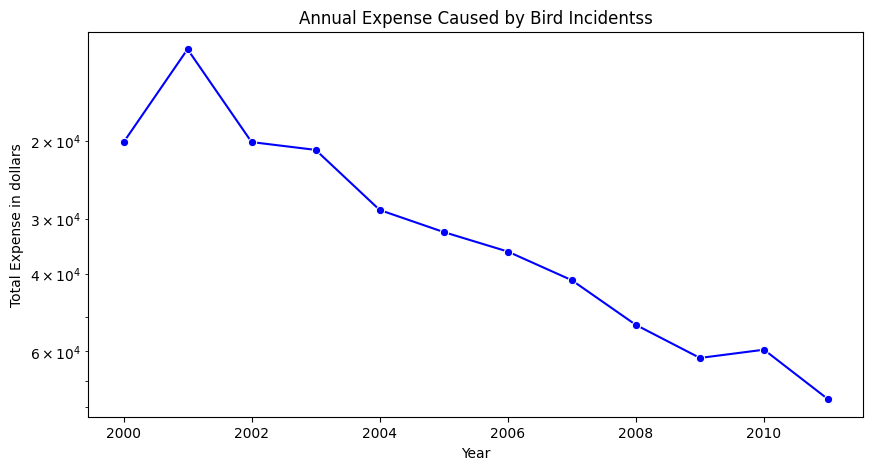

In [19]:
annual_expense_caused_by_incidents(df)

<ipython-input-8-d365c3dc5f3b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis')


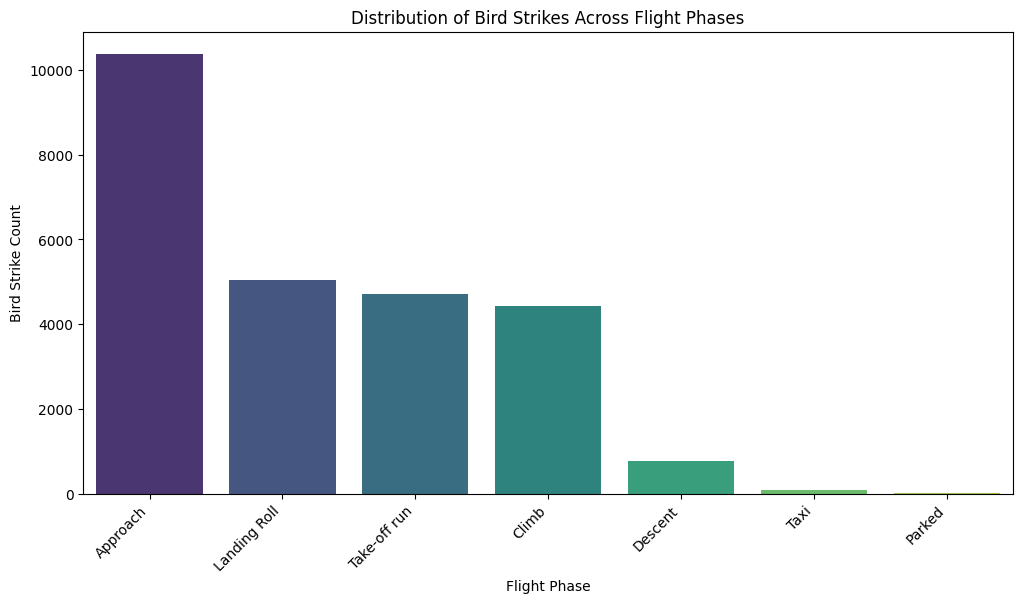

In [20]:
plot_bird_strike_distribution(df)

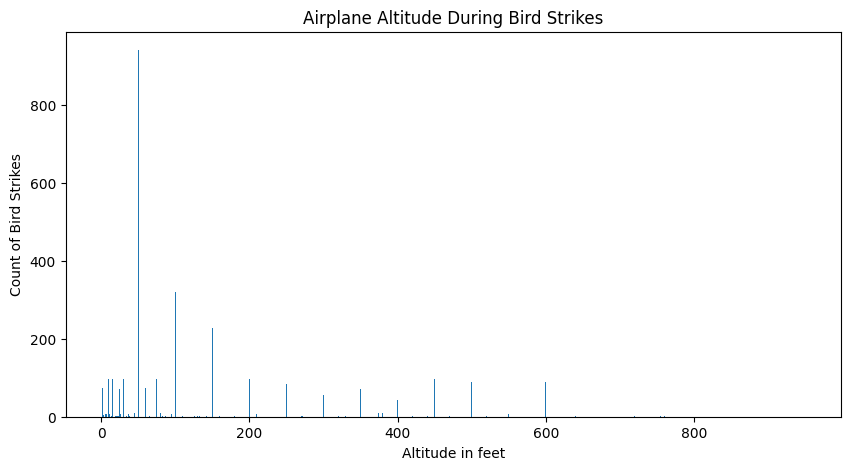

In [21]:
altitude_of_airplanes_at_time_of_strike(df)

<ipython-input-10-a66839e3d25b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis')


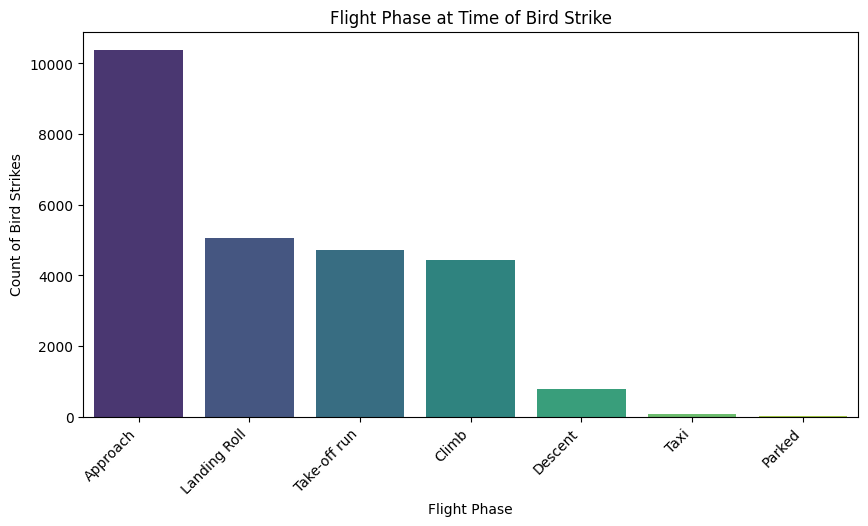

In [22]:
plot_flight_phase_at_strike(df)

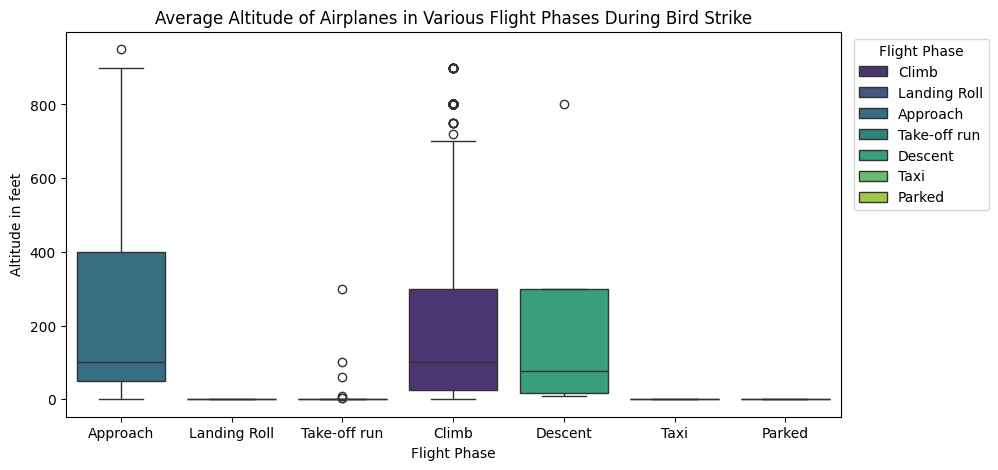

In [23]:
plot_airplane_altitudes(df)

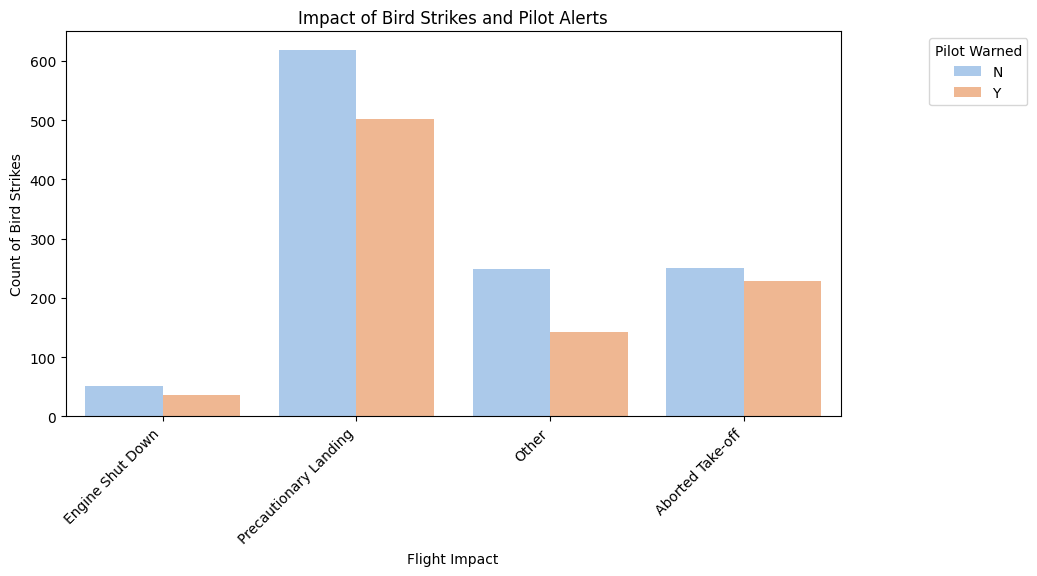

In [24]:
visualize_bird_strike_impact(df)

<ipython-input-13-da10a5538e32>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Effect: Impact to flight', data=df, palette='viridis')


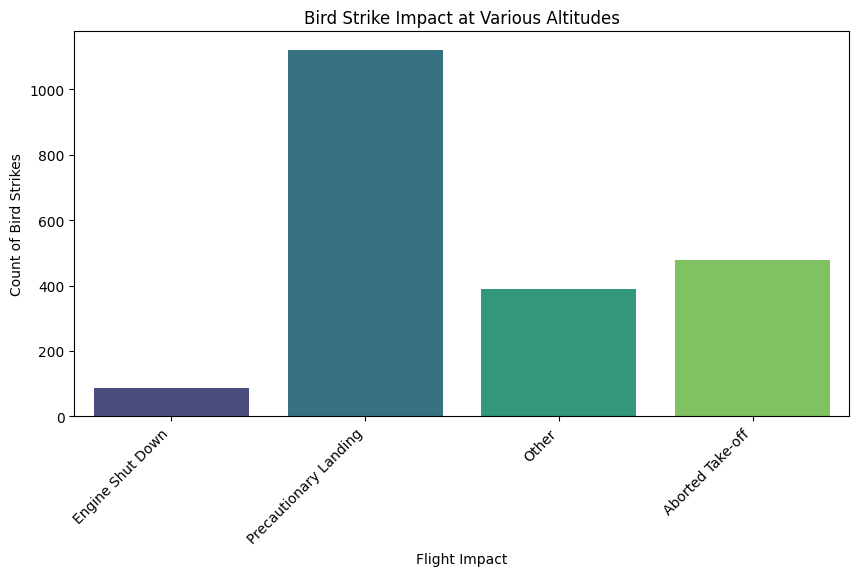

In [25]:
plot_bird_strike_impact_by_altitude(df)

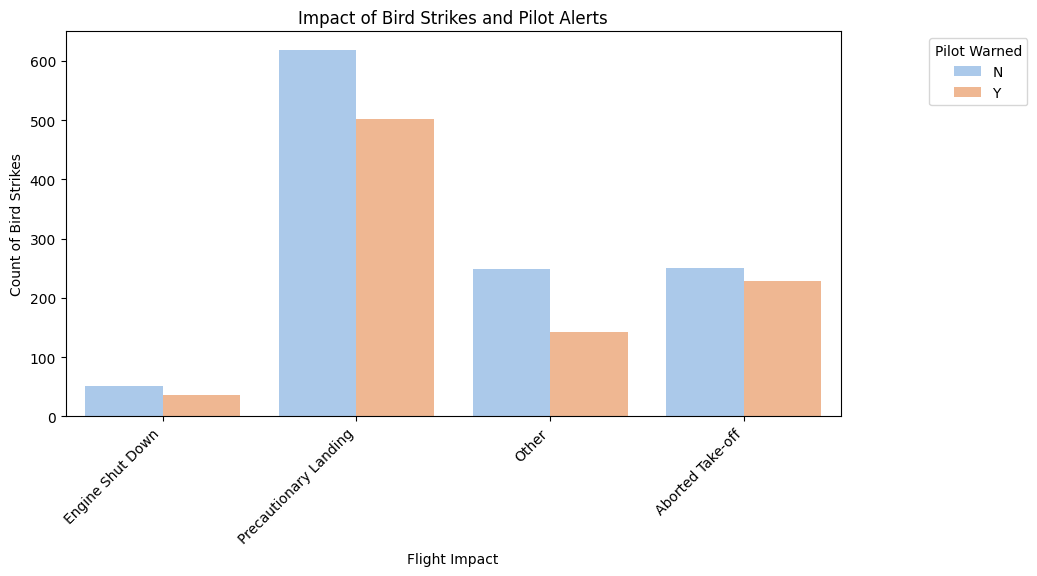

In [26]:
visualize_bird_strike_impact(df)